## 概要
---

### 使用逆矩阵方法

这里我们通过 TensorFlow 中的矩阵逆方法来实现二维线性回归。

### 模型

给定 $A*x = b$ 我们可通过如下步骤求解 x：

$(t(A) * A) * x = t(A) * b$

$x = (t(A) * A)^{-1} * t(A) * b$

这里，注意 t(A) 是 A 的转置。

## 线性回归：逆矩阵法

本节探讨如何使用 TensorFlow 逆矩阵来完成线性回归。

给定该系统 $A \cdot x = y$，线性回归的逆矩阵方法（超定系统的方程式）可用来解决如下问题：$$x = (A^T \cdot A)^{-1} \cdot A^T \cdot y$$

注意：$x$ 是参数矩阵（长度为 $F+1$ 的向量，$F$ 是特征数）；矩阵 A 有如下形式：

$$A = 
\begin{bmatrix}
  1 & x_{11} & x_{12} & \cdots & x_{1F} \\
  1 & x_{21} & x_{22} & \cdots & x_{2F} \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  1 & x_{n1} & x_{n2} & \cdots & x_{nF}
\end{bmatrix}
$$

$F$ 是独立特征数，$n$ 是点数。对于超定系统，$n>F$。请记住我们系统中的一个观察点的长度将为 $F+1$，第 $i^{th}$ 个点如下：

$$point_i = (y_i, x_{i1}, x_{i2}, \cdots, x_{iF})$$

本节，我们将只考虑一个二维系统（$F=1$）,这样我们将在稍后画图。

好了，加载必要的库：

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

启动会话：

In [2]:
sess= tf.Session()

为了说明目的，我们随机生成数据以拟合。

x-values 将是 0 到 100 之间的 100 个均匀间隔值的序列。

y-values 将拟合这条线：$y=x$，但我们将根据 $N(0, 1)$ 加上正态分布的误差值。

In [15]:
# Create the data
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)

我们创建设计矩阵 A，它将是一列 1 和 x-values。

In [14]:
# Create design matrix
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((x_vals_column, ones_column))

现在我们使用 numpy 创建矩阵 y-values。

有了 y-values 和设计矩阵，我们从他们创建 tensor。

In [7]:
# 格式化矩阵 y
y = np.transpose(np.matrix(y_vals))

# 创建 tensor
A_tensor = tf.constant(A)
y_tensor = tf.constant(y)

现在我们使用 tensorflow 操作求解参数矩阵。

In [8]:
# 矩阵逆求解
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
solution = tf.matmul(product, y_tensor)

运行 solution，并从参数矩阵中提取斜率和截距。

In [9]:
solution_eval = sess.run(solution)

# 提取系数
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]

现在我们打印找到的 solution 并创建最佳拟合直线。

In [12]:
print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

# 获得最佳拟合直线
best_fit = []
for i in x_vals:
    best_fit.append(slope * i + y_intercept)

slope: 0.967783177769
y_intercept: 0.171930574947


绘图：

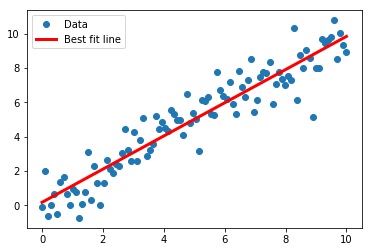

In [13]:
# 绘制结果
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()